El presente informe tiene como objetivo presentar el análisis de datos del registro histórico de consumos de la línea aérea Airways, obtenido del dataset disponible en Kaggle https://www.kaggle.com/datasets/ghassenkhaled/airways-customer-data. El análisis se realizó como parte del Trabajo Práctico 1 de la materia Organización de datos, con el fin de realizar un análisis exploratorio del set de datos.

El dataset utilizado incluye información sobre reservas, venta de pasajes y reviews de clientes, lo que permite realizar un análisis exhaustivo de las diferentes variables que pueden afectar la demanda de los servicios de Airways. A través del análisis de datos, se pretende identificar patrones, tendencias y relaciones entre las distintas variables, con el objetivo de obtener información valiosa para la toma de decisiones estratégicas por parte de la aerolínea.

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
!pip install pyairports

In [86]:
from pyairports.airports import Airports
airports = Airports()
import numpy as np

In [87]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [88]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [89]:
id ='15em7ZvSb1c0ZkOJ9hsH-pYa-pNO4kLb6'
dowloaded = drive.CreateFile({"id": id})
dowloaded.GetContentFile('customer_airways_data.csv')

airways_data=pd.read_csv('customer_airways_data.csv', encoding='ISO-8859-1')
airways_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [90]:
airways_data["num_passengers"]= airways_data["num_passengers"].astype(np.uint8)
airways_data["purchase_lead"]= airways_data["purchase_lead"].astype(np.uint16)
airways_data["length_of_stay"]= airways_data["length_of_stay"].astype(np.uint16)
airways_data["flight_hour"]= airways_data["flight_hour"].astype(np.uint8)
airways_data["wants_extra_baggage"]= airways_data["wants_extra_baggage"].astype(np.uint8)
airways_data["wants_preferred_seat"]= airways_data["wants_preferred_seat"].astype(np.uint8)
airways_data["wants_in_flight_meals"]= airways_data["wants_in_flight_meals"].astype(np.uint8)
airways_data["flight_duration"]= airways_data["flight_duration"].astype(np.float32)
airways_data["booking_complete"]= airways_data["booking_complete"].astype(np.uint8)

In [91]:
airways_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  uint8  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  uint16 
 4   length_of_stay         50000 non-null  uint16 
 5   flight_hour            50000 non-null  uint8  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  uint8  
 10  wants_preferred_seat   50000 non-null  uint8  
 11  wants_in_flight_meals  50000 non-null  uint8  
 12  flight_duration        50000 non-null  float32
 13  booking_complete       50000 non-null  uint8  
dtypes: float32(1), object(5), uint16(2), uint8(6)
memory u

Se agregan las columnas nuevas de pais de origen y llegada utilizando el dato de ruta

In [92]:
airways_data['aeropuerto_origen'] = airways_data['route'].str.slice(stop=3)
airways_data['aeropuerto_llegada'] = airways_data['route'].str.slice(start=-3)
def dar_pais_aeropuerto(iata):
  return (airports.airport_iata(iata)[2])
airways_data['pais_origen'] = airways_data['aeropuerto_origen'].apply(dar_pais_aeropuerto)
airways_data['pais_llegada'] = airways_data['aeropuerto_llegada'].apply(dar_pais_aeropuerto)

Ahora tambien se agrega los nombres y codigos de los paises de partida y llegada

In [93]:
id ='19pjELLofiy7TYQUpmCBrT6PnGMGXmpZh'
dowloaded = drive.CreateFile({"id": id})
dowloaded.GetContentFile('cleaned-reviews.csv')

cleaned_reviews=pd.read_csv('cleaned-reviews.csv', encoding='ISO-8859-1')
cleaned_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3411 entries, 0 to 3410
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3411 non-null   int64 
 1   reviews     3411 non-null   object
 2   rates       3411 non-null   int64 
 3   date        3411 non-null   object
 4   country     3411 non-null   object
 5   verified    3411 non-null   bool  
 6   comments    3411 non-null   object
dtypes: bool(1), int64(2), object(4)
memory usage: 163.3+ KB


In [94]:
cleaned_reviews["rates"]= cleaned_reviews["rates"].astype(np.uint8)
cleaned_reviews["date"]= pd.to_datetime(cleaned_reviews["date"])

In [95]:
df_codes = pd.read_csv("https://gist.githubusercontent.com/metal3d/5b925077e66194551df949de64e910f6/raw/c5f20a037409d96958553e2eb6b8251265c6fd63/country-coord.csv")
df_codes.rename(columns={'Country': 'country'}, inplace=True)
df_codes.rename(columns={'Alpha-3 code': 'codigo_pais'}, inplace=True)
df_codes = df_codes[['codigo_pais',"country"]]

In [96]:
cleaned_reviews = pd.merge(cleaned_reviews, df_codes, on='country', how='inner')
airways_data = pd.merge(airways_data, df_codes, left_on='pais_origen', right_on='country', how='inner')
airways_data = airways_data.rename(columns={'codigo_pais': 'codigo_pais_origen'})
airways_data = pd.merge(airways_data, df_codes, left_on='pais_llegada', right_on='country', how='inner')
airways_data = airways_data.rename(columns={'codigo_pais': 'codigo_pais_llegada'})
airways_data = airways_data.drop(columns=['country_x'])
airways_data = airways_data.drop(columns=['country_y'])

In [97]:
airways_data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,aeropuerto_origen,aeropuerto_llegada,pais_origen,pais_llegada,codigo_pais_origen,codigo_pais_llegada
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,AKL,DEL,New Zealand,India,NZL,IND
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,AKL,DEL,New Zealand,India,NZL,IND
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,AKL,DEL,New Zealand,India,NZL,IND
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,AKL,DEL,New Zealand,India,NZL,IND
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,AKL,DEL,New Zealand,India,NZL,IND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34534,1,Internet,RoundTrip,56,6,8,Tue,MELMLE,Australia,0,0,0,8.83,0,MEL,MLE,Australia,Maldives,AUS,MDV
34535,2,Internet,RoundTrip,10,6,23,Tue,MELMLE,Australia,0,0,0,8.83,0,MEL,MLE,Australia,Maldives,AUS,MDV
34536,2,Internet,RoundTrip,75,6,12,Mon,MELMLE,Australia,1,1,0,8.83,0,MEL,MLE,Australia,Maldives,AUS,MDV
34537,1,Internet,RoundTrip,64,6,14,Thu,MELMLE,Australia,0,0,0,8.83,0,MEL,MLE,Australia,Maldives,AUS,MDV


Se elimina la columna Unnamed ya que si su función es la de ser un indice, estaba contando mal

In [98]:
cleaned_reviews.drop(cleaned_reviews.columns[0], axis=1, inplace=True)
cleaned_reviews.reset_index()

,index,reviews,rates,date,country,verified,comments,codigo_pais
0,0,â Trip Verified | Excellent service both on ...,5,2023-01-24,United Kingdom,True,excellent service ground board first class pro...,GBR
1,1,â Trip Verified | Good lounge at Cape Town....,9,2023-01-24,United Kingdom,True,good lounge cape town time departure drink hig...,GBR
2,2,â Trip Verified | A really excellent journe...,9,2023-01-23,United Kingdom,True,really excellent journey lounge overcrowded la...,GBR
3,3,â Trip Verified | This flight was one of th...,9,2023-01-21,United Kingdom,True,flight one worst ever life wanted pamper bough...,GBR
4,4,Not Verified | As a Spanish born individual l...,3,2023-01-19,United Kingdom,False,verified spanish born individual living englan...,GBR
...,...,...,...,...,...,...,...,...
3395,3395,Flew British Airways from Helsinki - London He...,4,2016-03-14,Finland,False,flew british airway helsinki london heathrow m...,FIN
3396,3396,Our British Airways flight from Helsinki to Lo...,3,2015-10-10,Finland,False,british airway flight helsinki london issue br...,FIN
3397,3397,Flew from Kiev to London on their Airbus 319 i...,8,2015-06-12,Ukraine,False,flew kiev london airbus business class leg roo...,UKR
3398,3398,Travelled from Barbados to London Gatwick and ...,9,2014-06-04,Barbados,False,avelled barbados london gatwick onwards italy ...,BRB


In [99]:
cleaned_reviews

,reviews,rates,date,country,verified,comments,codigo_pais
0,â Trip Verified | Excellent service both on ...,5,2023-01-24,United Kingdom,True,excellent service ground board first class pro...,GBR
1,â Trip Verified | Good lounge at Cape Town....,9,2023-01-24,United Kingdom,True,good lounge cape town time departure drink hig...,GBR
2,â Trip Verified | A really excellent journe...,9,2023-01-23,United Kingdom,True,really excellent journey lounge overcrowded la...,GBR
3,â Trip Verified | This flight was one of th...,9,2023-01-21,United Kingdom,True,flight one worst ever life wanted pamper bough...,GBR
4,Not Verified | As a Spanish born individual l...,3,2023-01-19,United Kingdom,False,verified spanish born individual living englan...,GBR
...,...,...,...,...,...,...,...
3395,Flew British Airways from Helsinki - London He...,4,2016-03-14,Finland,False,flew british airway helsinki london heathrow m...,FIN
3396,Our British Airways flight from Helsinki to Lo...,3,2015-10-10,Finland,False,british airway flight helsinki london issue br...,FIN
3397,Flew from Kiev to London on their Airbus 319 i...,8,2015-06-12,Ukraine,False,flew kiev london airbus business class leg roo...,UKR
3398,Travelled from Barbados to London Gatwick and ...,9,2014-06-04,Barbados,False,avelled barbados london gatwick onwards italy ...,BRB


In [100]:
cleaned_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   reviews      3400 non-null   object        
 1   rates        3400 non-null   uint8         
 2   date         3400 non-null   datetime64[ns]
 3   country      3400 non-null   object        
 4   verified     3400 non-null   bool          
 5   comments     3400 non-null   object        
 6   codigo_pais  3400 non-null   object        
dtypes: bool(1), datetime64[ns](1), object(4), uint8(1)
memory usage: 139.6+ KB


Buscando Outliers en airways_data




In [101]:
col_numericas = []
tipos_numericos = [np.float32, np.uint8, np.uint16, np.int64]
for columna in airways_data.columns:
  if (airways_data[columna].dtype in tipos_numericos):
    col_numericas.append(columna);

In [102]:
airways_data[col_numericas].describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,34539.000000,34539.000000,34539.000000,34539.000000,34539.000000,34539.000000,34539.000000,34539.000000,34539.000000
mean,1.604737,86.394540,24.495469,9.029706,0.666174,0.312516,0.434118,7.461254,0.154608
std,1.037541,91.489966,35.241436,5.466652,0.471585,0.463526,0.495648,1.456889,0.361536
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.720000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,52.000000,17.000000,9.000000,1.000000,0.000000,0.000000,8.580000,0.000000
75%,2.000000,118.000000,29.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


Matriz de correlacion:

In [103]:
corr_matriz = airways_data[col_numericas].corr()
np.fill_diagonal(corr_matriz.values, np.nan)

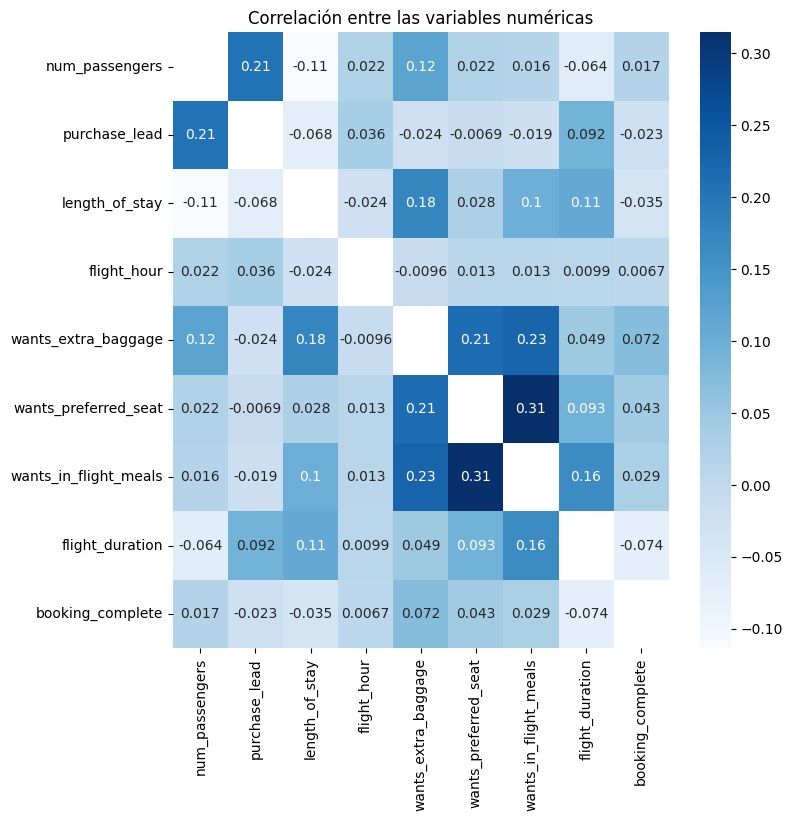

In [104]:
plt.figure(figsize=(8,8))
heatmap=sns.heatmap(corr_matriz, annot = True, cmap='Blues', cbar="BBBBBBBBBBBBBBBB")
heatmap.set_title("Correlación entre las variables numéricas")

plt.show()

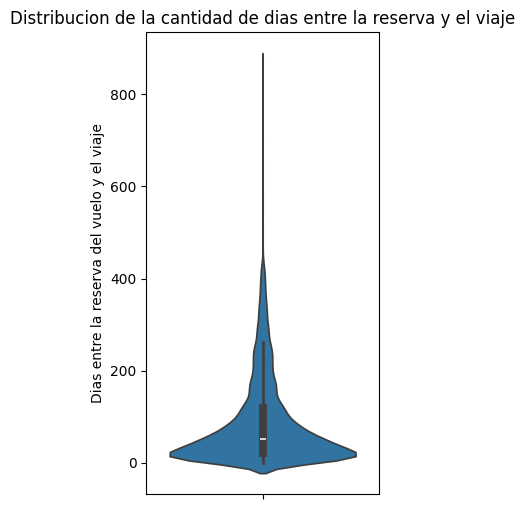

In [105]:
plt.figure(figsize=(3,6))
sns.violinplot(data=airways_data['purchase_lead'])
plt.title('Distribucion de la cantidad de dias entre la reserva y el viaje')
plt.ylabel('Dias entre la reserva del vuelo y el viaje')
plt.show()

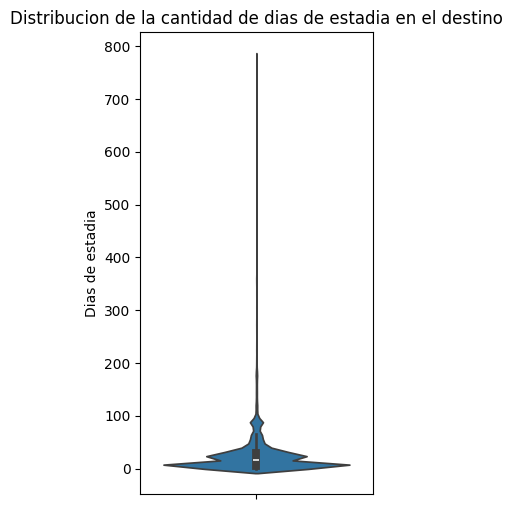

In [106]:
plt.figure(figsize=(3,6))
sns.violinplot(data=airways_data['length_of_stay'])
plt.title('Distribucion de la cantidad de dias de estadia en el destino')
plt.ylabel('Dias de estadia')
plt.show()

**Metricas**

1) Distribucion de vuelos según el dia de la semana

<ipython-input-107-98049b14a2c4>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




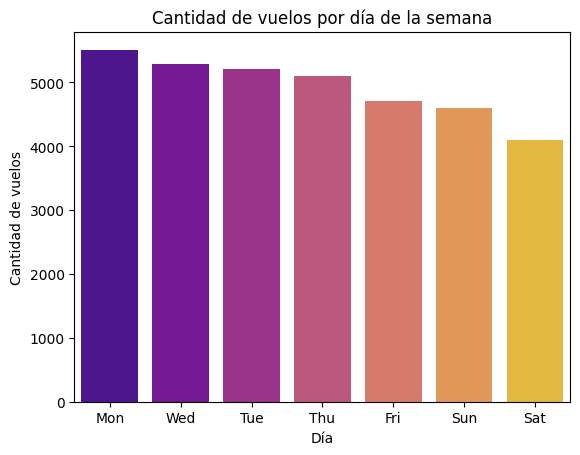

In [107]:
vuelos_por_dia = airways_data['flight_day'].value_counts()

sns.barplot(x=vuelos_por_dia.index, y=vuelos_por_dia.values, palette="plasma")

plt.xlabel('Día')
plt.ylabel('Cantidad de vuelos')
plt.title('Cantidad de vuelos por día de la semana')

plt.show()

Donde se ve que Martes/Miercoles y Sabado/Domingo estan invertidos tomando en cuenta el orden natural de los dias de la semana

2) Promedio de notas a través del tiempo, tanto para usuarios verificados como no verificados

Primero filtro los verificados de cleaned_reviews

In [108]:
verified_reviews = cleaned_reviews[cleaned_reviews['verified']]
date_reviews = verified_reviews.loc[:,['rates','date','country']]
date_reviews['año'] = cleaned_reviews['date'].dt.year
date_reviews

,rates,date,country,año
0,5,2023-01-24,United Kingdom,2023
1,9,2023-01-24,United Kingdom,2023
2,9,2023-01-23,United Kingdom,2023
3,9,2023-01-21,United Kingdom,2023
5,2,2023-01-18,United Kingdom,2023
...,...,...,...,...
3354,9,2018-10-17,Austria,2018
3365,3,2018-03-13,Portugal,2018
3366,1,2018-03-06,Portugal,2018
3367,2,2018-01-17,Portugal,2018


In [109]:
date_reviews['day'] = date_reviews['date'].dt.dayofweek
date_reviews['day'] = date_reviews['day'].map({
  0: 'Mon',
  1: 'Tue',
  2: 'Wed',
  3: 'Thu',
  4: 'Fri',
  5: 'Sat',
  6: 'Sun'
})
date_reviews

,rates,date,country,año,day
0,5,2023-01-24,United Kingdom,2023,Tue
1,9,2023-01-24,United Kingdom,2023,Tue
2,9,2023-01-23,United Kingdom,2023,Mon
3,9,2023-01-21,United Kingdom,2023,Sat
5,2,2023-01-18,United Kingdom,2023,Wed
...,...,...,...,...,...
3354,9,2018-10-17,Austria,2018,Wed
3365,3,2018-03-13,Portugal,2018,Tue
3366,1,2018-03-06,Portugal,2018,Tue
3367,2,2018-01-17,Portugal,2018,Wed


Analizo el promedio y la cantidad de reviews segun los años

In [110]:
reviews_info = date_reviews.groupby('año')['rates'].agg(['mean', 'count']).reset_index()
reviews_info.rename(columns={'mean':'promedio_notas', 'count':'cantidad_notas'}, inplace=True)
reviews_info

,año,promedio_notas,cantidad_notas
0,2017,4.065217,46
1,2018,4.337621,311
2,2019,4.767213,305
3,2020,4.333333,81
4,2021,4.394366,71
5,2022,4.096552,145
6,2023,5.583333,12


Hacemos lo mismo para los no verificados, descartando los años anterios al 2017 para que tengan el mismo dominio al graficar

In [111]:

not_verified_reviews = cleaned_reviews[~cleaned_reviews['verified']]
date_reviews_not_verified = not_verified_reviews.loc[:,['rates','date','country']]
date_reviews_not_verified['año'] = cleaned_reviews['date'].dt.year
date_reviews_not_verified['day'] = date_reviews_not_verified['date'].dt.dayofweek
date_reviews_not_verified['day'] = date_reviews_not_verified['day'].map({
  0: 'Mon',
  1: 'Tue',
  2: 'Wed',
  3: 'Thu',
  4: 'Fri',
  5: 'Sat',
  6: 'Sun'
})
reviews_info_not_verified = date_reviews_not_verified.groupby('año')['rates'].agg(['mean', 'count']).reset_index()
reviews_info_not_verified.rename(columns={'mean':'promedio_notas', 'count':'cantidad_notas'}, inplace=True)
reviews_info_not_verified=reviews_info_not_verified[reviews_info_not_verified["año"] > 2016]
reviews_info_not_verified

,año,promedio_notas,cantidad_notas
3,2017,3.842912,522
4,2018,4.250000,12
5,2019,4.729167,48
6,2020,4.391304,23
7,2021,4.000000,16
8,2022,3.823529,68
9,2023,3.000000,5


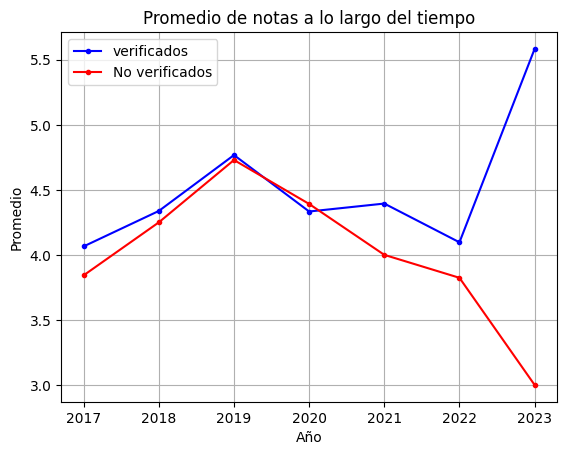

In [112]:
plt.plot(reviews_info["año"], reviews_info['promedio_notas'], "b.-", label="verificados")
plt.plot(reviews_info["año"], reviews_info_not_verified['promedio_notas'], "r.-", label="No verificados")
plt.title('Promedio de notas a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Promedio')
plt.grid(True)
plt.legend()
plt.show()

3) Distribución de la cantidad de reviews verificadas en cada año

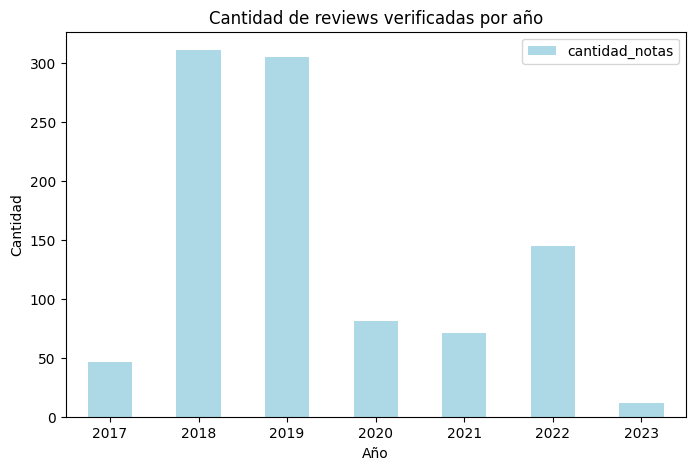

In [113]:
reviews_info.plot.bar(x='año', y='cantidad_notas',figsize=(8,5), color='lightblue', rot=0)
plt.title('Cantidad de reviews verificadas por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.show()

4) Pasajeros segun los canales de venta

In [114]:
airways_info = airways_data.groupby('sales_channel')['num_passengers'].sum().to_frame().reset_index()
airways_info

,sales_channel,num_passengers
0,Internet,49002
1,Mobile,6424


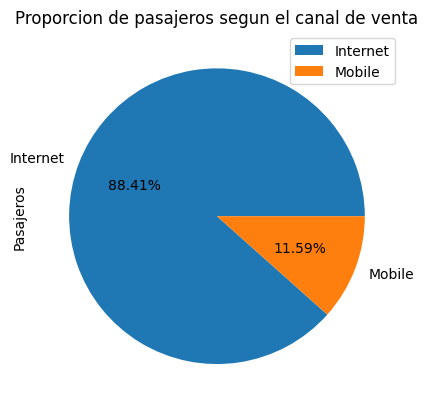

In [115]:
airways_info = airways_data.groupby('sales_channel')['num_passengers'].sum().to_frame()
airways_info.plot(kind='pie', y='num_passengers', autopct='%1.2f%%')
plt.title('Proporcion de pasajeros segun el canal de venta')
plt.ylabel('Pasajeros')
plt.show()

5) Paises con mas reviews verificadas

In [116]:
grupo_paises_verificados = cleaned_reviews.groupby(['country'])[ 'verified'].sum()
df_grupo_paises_verificados = pd.DataFrame({'country': grupo_paises_verificados.index, 'verificados': grupo_paises_verificados.values})
df_paises_codes_verificados = pd.merge(df_grupo_paises_verificados, df_codes, on='country', how='inner')

In [117]:
fig = px.choropleth(df_paises_codes_verificados, locations="codigo_pais",
                    color="verificados",
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.deep)
fig.update_layout(
    title_text = 'Paises con mas mas cantidad de reviews verificadas',
)
fig.show()

6) Distribucion de las notas por país

In [118]:
reviews_country = date_reviews['country'].value_counts(ascending=False).to_frame()
most_review_contries = reviews_country.head(5)
most_review_contries

,count
country,
United Kingdom,558
United States,137
Australia,30
Germany,28
Canada,28


In [119]:
rev_countries = date_reviews[date_reviews['country'].isin(most_review_contries.reset_index()['country'])]
rev_countries

,rates,date,country,año,day
0,5,2023-01-24,United Kingdom,2023,Tue
1,9,2023-01-24,United Kingdom,2023,Tue
2,9,2023-01-23,United Kingdom,2023,Mon
3,9,2023-01-21,United Kingdom,2023,Sat
5,2,2023-01-18,United Kingdom,2023,Wed
...,...,...,...,...,...
3049,2,2018-02-05,Germany,2018,Mon
3050,1,2018-01-14,Germany,2018,Sun
3051,9,2017-12-12,Germany,2017,Tue
3052,8,2017-11-30,Germany,2017,Thu


<ipython-input-120-aafabafdb061>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Notas')

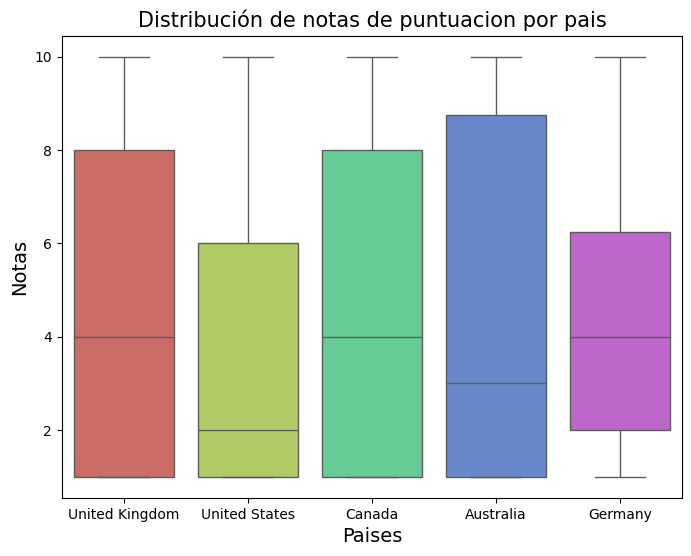

In [120]:
plt.figure(figsize=(8, 6))
g = sns.boxplot(x='country',y='rates',data=rev_countries, palette='hls')
g.set_title('Distribución de notas de puntuacion por pais', fontsize=15)
g.set_xlabel('Paises',fontsize=14)
g.set_ylabel('Notas',fontsize=14)

7) Distribución de la cantidad de puntuaciones

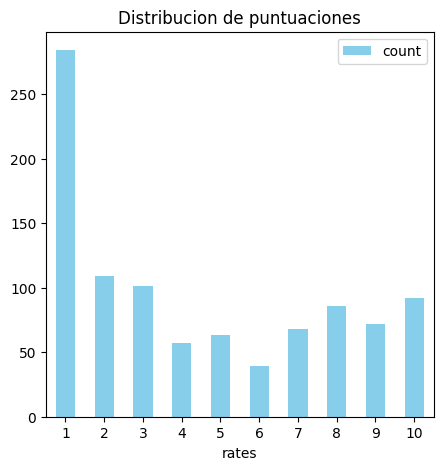

In [121]:
count_rates = date_reviews.groupby('rates').size().reset_index(name='count')
count_rates.plot.bar(x='rates',  y='count', figsize=(5, 5), rot=0, color="skyblue")
plt.title('Distribucion de puntuaciones')
plt.show()

8) Reservas completas

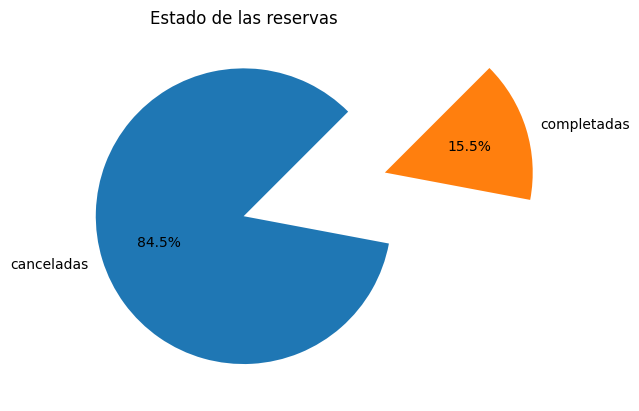

In [122]:
plt.pie(airways_data['booking_complete'].value_counts(), airways_data['booking_complete'].value_counts().index, autopct='%1.1f%%', startangle=45, labels=["canceladas","completadas"])
plt.title('Estado de las reservas')

plt.show()

Si queremos ampliar y ver lo que pasa con cada país en los distintos canales de venta:

In [123]:
tree_airways_data=airways_data[['sales_channel', 'booking_complete','pais_llegada']]
sustitucion = {0: "Canceladas", 1: "Completadas"}
tree_airways_data['booking_complete']=tree_airways_data["booking_complete"].replace(sustitucion)
fig = px.treemap(tree_airways_data, path=['sales_channel', 'booking_complete','pais_llegada'], title="Destinos que mas cancelan/completan reservas en los diferentes canales de venta", color="pais_llegada")
fig.update_traces(marker=dict(cornerradius=5))
fig.show()

<ipython-input-123-f91e2d95e55e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Vemos que mas o menos se mantiene la proporcion aunque varie el canal y que los paises que completan o cancelan tambien se mantienen

9) Rutas con reservas canceladas

In [124]:
df_reservas_canceladas = airways_data[airways_data['booking_complete']==0]
df_reservas_canceladas['route'].value_counts().head(5)

route
AKLKUL    2113
DMKPER     642
DMKOOL     615
DMKKIX     557
MELPEN     512
Name: count, dtype: int64

In [125]:
df_cancelaciones_llegada=df_reservas_canceladas['codigo_pais_llegada'].value_counts().to_frame()
df_cancelaciones_llegada.head(10)

,count
codigo_pais_llegada,
AUS,14227
MYS,4812
CHN,2917
JPN,2805
SGP,934
KHM,781
IND,683
IDN,584
THA,512


In [126]:
fig = px.choropleth(df_cancelaciones_llegada, locations=df_cancelaciones_llegada.index,
                    color="count",
                    hover_name="count",
                    color_continuous_scale=px.colors.sequential.deep)
fig.update_layout(
    title_text = 'Paises de destino que sufren mas cancelaciones de reservas',
)
fig.show()

In [127]:
df_cancelaciones_origen=df_reservas_canceladas['codigo_pais_origen'].value_counts().to_frame()
df_cancelaciones_origen.head(10)

,count
codigo_pais_origen,
THA,5314
IND,4249
MYS,3387
IDN,3128
JPN,2856
AUS,2831
NZL,2160
CHN,1701
LKA,1211


In [128]:
fig = px.choropleth(df_cancelaciones_origen, locations=df_cancelaciones_origen.index,
                    color="count",
                    hover_name="count",
                    color_continuous_scale=px.colors.sequential.deep)
fig.update_layout(
    title_text = 'Paises de origen que sufren mas cancelaciones de reservas',
)
fig.show()

10) Relacion entre el promedio de notas y el las horas de vuelo

In [129]:
filtered_airways_data = airways_data[airways_data['booking_complete']==1]
filtered_airways_data.head(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,aeropuerto_origen,aeropuerto_llegada,pais_origen,pais_llegada,codigo_pais_origen,codigo_pais_llegada
23,1,Internet,RoundTrip,285,5,6,Sun,BKIDEL,Malaysia,1,0,0,5.52,1,BKI,DEL,Malaysia,India,MYS,IND
38,1,Internet,RoundTrip,68,35,5,Sun,CGKDEL,Indonesia,1,1,1,5.52,1,CGK,DEL,Indonesia,India,IDN,IND
42,3,Internet,RoundTrip,84,30,14,Fri,CGKDEL,Indonesia,1,1,0,5.52,1,CGK,DEL,Indonesia,India,IDN,IND
45,3,Internet,RoundTrip,54,42,4,Sun,CGKDEL,Singapore,1,0,0,5.52,1,CGK,DEL,Indonesia,India,IDN,IND
58,1,Internet,RoundTrip,67,17,9,Mon,CGKDEL,France,0,0,0,5.52,1,CGK,DEL,Indonesia,India,IDN,IND


In [130]:
extra_service_country = filtered_airways_data[['booking_origin', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']].groupby('booking_origin').agg('sum')
extra_service_country = extra_service_country.reset_index()
extra_service_country.rename(columns={'booking_origin':'country'}, inplace=True)

In [131]:

rates_country = date_reviews.loc[:, ['rates', 'country']]
rates_country

,rates,country
0,5,United Kingdom
1,9,United Kingdom
2,9,United Kingdom
3,9,United Kingdom
5,2,United Kingdom
...,...,...
3354,9,Austria
3365,3,Portugal
3366,1,Portugal
3367,2,Portugal


In [132]:
countries_rates = rates_country[['country', 'rates']].groupby('country').agg('mean')
countries_data_service = extra_service_country.merge(countries_rates, on='country')

In [133]:

countries_flight_duration = filtered_airways_data.loc[:, ['booking_origin', 'flight_duration']]
countries_flight_duration = countries_flight_duration.groupby('booking_origin').mean().reset_index()
countries_flight_duration.rename(columns={'booking_origin':'country'}, inplace=True)

countries_data = countries_data_service.merge(countries_flight_duration, on='country')

In [134]:
most_reviews_flight_dur = countries_data[countries_data['country'].isin(reviews_country.index)]
most_reviews_flight_dur.head(5)

,country,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,rates,flight_duration
0,Australia,539,322,437,4.566667,8.012622
1,Belgium,1,1,0,5.400000,7.570000
2,Canada,1,1,0,4.535714,8.830000
3,China,456,161,246,5.000000,5.873314
4,Denmark,1,0,1,7.000000,7.225000


Text(0, 0.5, 'Promedio de puntuacion')

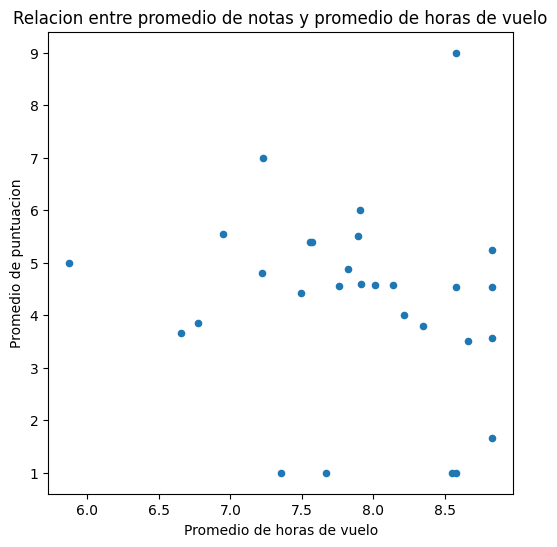

In [135]:
most_reviews_flight_dur.plot.scatter('flight_duration', 'rates', title='Relacion entre promedio de notas y promedio de horas de vuelo', figsize=(6,6))
ax=plt.gca()
ax.set_xlabel('Promedio de horas de vuelo')
ax.set_ylabel('Promedio de puntuacion')

11) Cantidad de solicitudes de servicios por pais

In [136]:
#canal_ventas = filtered_airways_data.loc[:, ['booking_origin', 'sales_channel']]

#canal_por_pais = canal_ventas.groupby(['booking_origin', 'sales_channel']).value_counts().to_frame().reset_index()
#canal_ventas_por_pais = canal_por_pais.pivot_table(index='booking_origin', columns='sales_channel', values='count', aggfunc='sum', fill_value=0)
#canal_ventas_por_pais.reset_index(inplace=True)
#canal_ventas_por_pais.rename(columns={'booking_origin':'country'},inplace=True)

In [137]:
df_servicios = most_reviews_flight_dur[most_reviews_flight_dur['country'].isin(reviews_country.index)]
df_servicios = df_servicios.loc[:, ['country', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']].rename(columns={'wants_extra_baggage':'Equipaje extra', 'wants_preferred_seat': 'Reservar asiento', 'wants_in_flight_meals':'Comida de avion'})
df_servicios

,country,Equipaje extra,Reservar asiento,Comida de avion
0,Australia,539,322,437
1,Belgium,1,1,0
2,Canada,1,1,0
3,China,456,161,246
4,Denmark,1,0,1
5,France,5,3,5
6,Germany,5,5,4
7,Greece,1,0,0
8,Hong Kong,46,27,33
9,India,84,61,77


In [138]:
df_servicios['total']=df_servicios.loc[:,['Equipaje extra','Reservar asiento','Comida de avion']].sum(axis=1)
df_servicios.sort_values(by='total', ascending=False, inplace=True)

Text(0, 0.5, 'Total servicios adicionales')

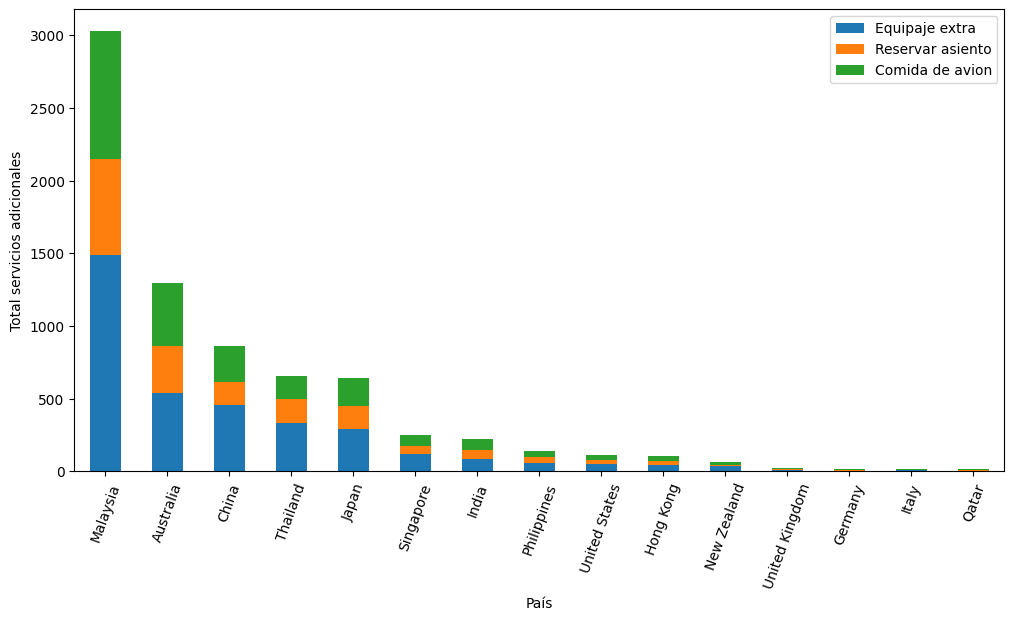

In [139]:
df_servicios.iloc[:15, :-1].plot.bar(x='country', stacked=True, rot=70, figsize=(12,6))
plt.gca().set_xlabel("País")
plt.gca().set_ylabel("Total servicios adicionales")

12) Proporción de los servicios adicionales en el viaje

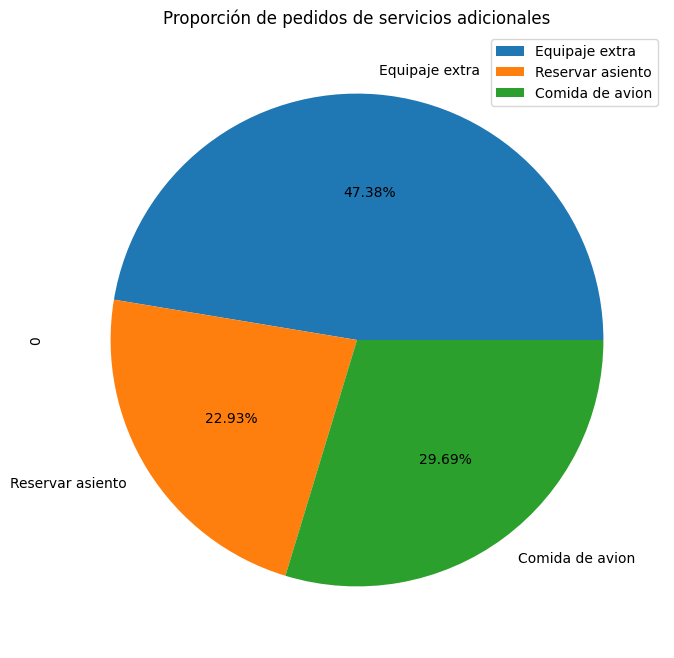

In [140]:
df_proporcion_servicios = df_servicios.loc[:,["Equipaje extra", "Reservar asiento", "Comida de avion"]].sum().to_frame()
df_proporcion_servicios.plot(kind='pie',subplots=True, autopct='%1.2f%%', figsize=(8, 8))
plt.title('Proporción de pedidos de servicios adicionales')
ax.axis('off')
plt.show()

13) Puntaje promedio por cada dia de la semana

Text(0, 0.5, 'Puntaje')

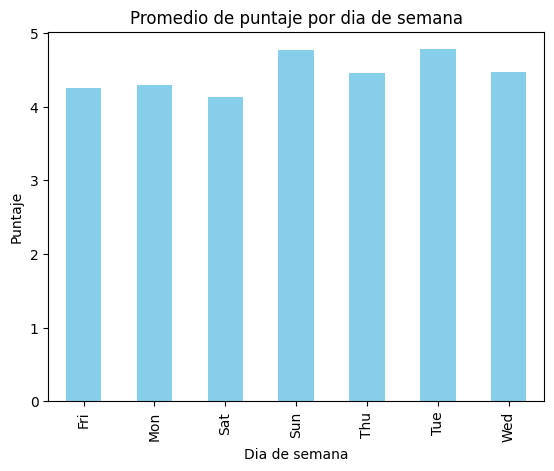

In [141]:
promedio_rates_por_dia = date_reviews.groupby('day')['rates'].mean()
promedio_rates_por_dia.plot(kind='bar', color='skyblue')
plt.title('Promedio de puntaje por dia de semana')
plt.xlabel('Dia de semana')
plt.ylabel('Puntaje')

14) Distribuciones de las doferentes puntuaciones a lo largo de la semana

Text(0.5, 1.0, 'Cantidad total de puntuacion por día')

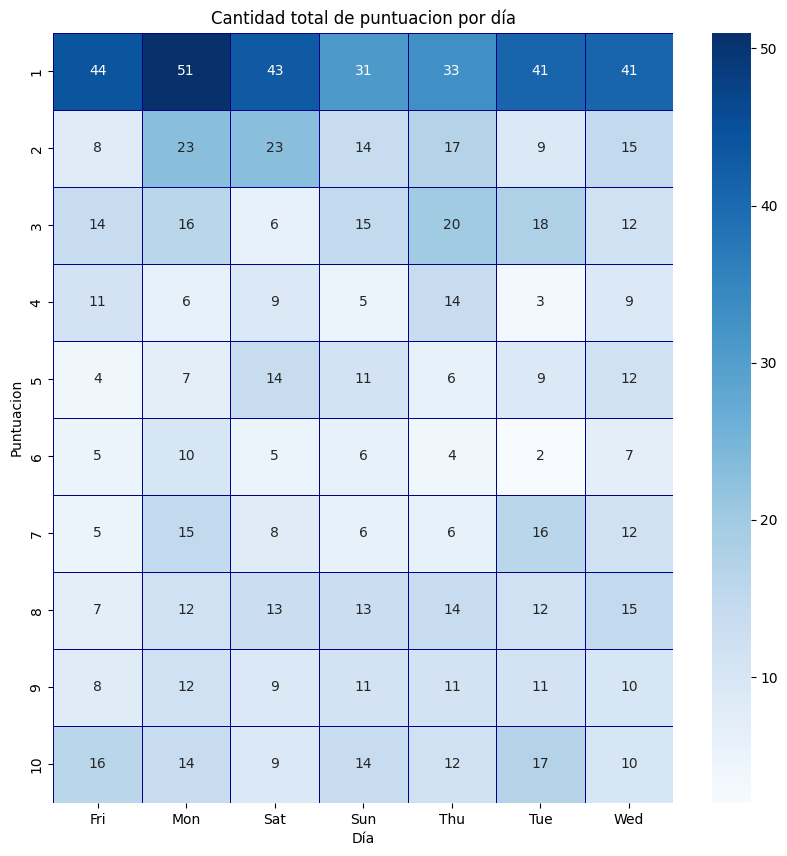

In [142]:
plt.figure(figsize=(10,10))
hm_promedio_por_dia = date_reviews.pivot_table(index='rates', columns='day', aggfunc='size')
sns.heatmap(hm_promedio_por_dia, linewidth=0.5, linecolor='darkblue', annot=True, cmap='Blues', fmt='g')
plt.xlabel('Día')
plt.ylabel('Puntuacion')
plt.title('Cantidad total de puntuacion por día')

--------------------------------------------------------------------------------
PARTE NLP

In [143]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

In [144]:
from nltk import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [145]:
stopwords = list(stopwords.words('english'))

In [146]:
countVec = CountVectorizer(lowercase=True, stop_words=stopwords, max_features=20000)

In [147]:
buscaVecinos = NearestNeighbors(metric="cosine", algorithm="brute")

In [148]:
comments_reviews = verified_reviews.loc[:,['reviews','rates','comments']]

worst_reviews = comments_reviews[comments_reviews['rates']<5].reset_index()
best_reviews = comments_reviews[comments_reviews['rates']>5].reset_index()

In [149]:
comments_reviews.isnull().sum().sort_values(ascending = False)

reviews     0
rates       0
comments    0
dtype: int64

In [150]:
best_comments = best_reviews["comments"]
worst_comments = worst_reviews["comments"]

In [151]:
worst_reviews['total palabras'] = worst_comments.map(len)
best_reviews['total palabras'] = best_comments.map(len)

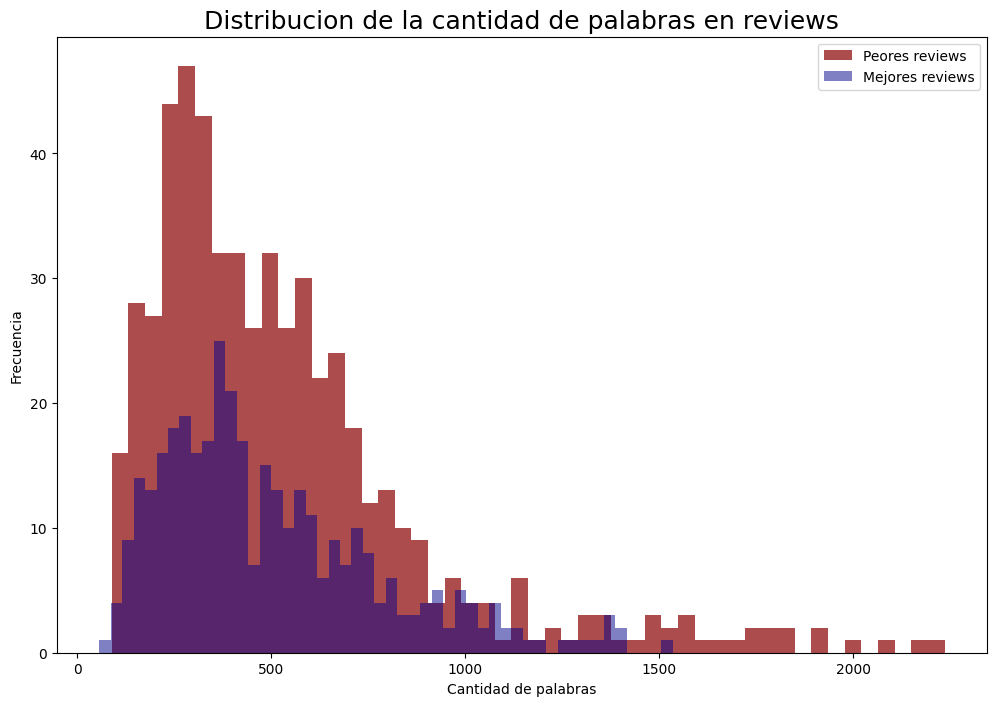

In [152]:
worst_reviews['total palabras'].plot.hist(alpha=0.7, figsize=(12,8), color='darkred', bins=50, label='Peores reviews')
best_reviews['total palabras'].plot.hist(alpha=0.5, figsize=(12,8), color='darkblue', bins=50, label='Mejores reviews')
plt.title('Distribucion de la cantidad de palabras en reviews', fontsize=18)
plt.xlabel('Cantidad de palabras')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

Frecuencia de aparicion de palabras

In [153]:
from wordcloud import WordCloud

Frecuencia de aparicion de palabras en buenas reviews



In [154]:
words_best = " ".join(best_reviews['comments'].str.lower())

palabras = words_best.split()
top_words_best = pd.Series(palabras).value_counts().to_frame().head(15)
top_words_best

,count
flight,727
ba,438
seat,387
service,260
london,256
time,211
crew,206
food,191
class,175
cabin,174


In [155]:
words_worst = " ".join(worst_reviews['comments'].str.lower())

palabras = words_worst.split()
top_words_worst = pd.Series(palabras).value_counts().to_frame().head(15)
top_words_worst

,count
flight,1144
ba,682
seat,561
service,434
london,418
time,323
food,310
hour,286
crew,276
class,270


Veo que hay palabras que se repiten mucho que son irrelevantes para el analisis

In [156]:
words_worst = words_worst.replace('flight', '')
words_best = words_best.replace('flight', '')

(-0.5, 1599.5, 799.5, -0.5)

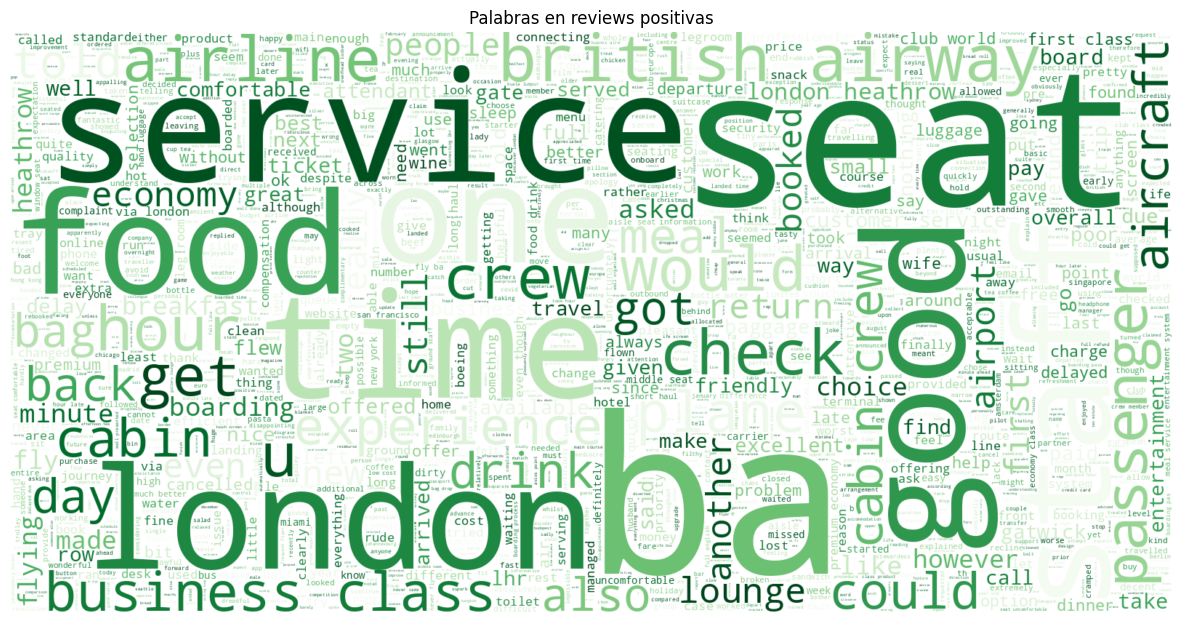

In [157]:
plt.figure(figsize=(15,15))
wordcloud = WordCloud(background_color="white", stopwords=stopwords, max_words=2000, max_font_size=300,  width=1600, height=800)
wordcloud.generate(words_best)
plt.imshow(wordcloud.recolor(colormap='Greens' , random_state=17), interpolation="bilinear")
plt.title('Palabras en reviews positivas')
plt.axis('off')

Frecuencia de aparicion de palabras en malas reviews

(-0.5, 1599.5, 799.5, -0.5)

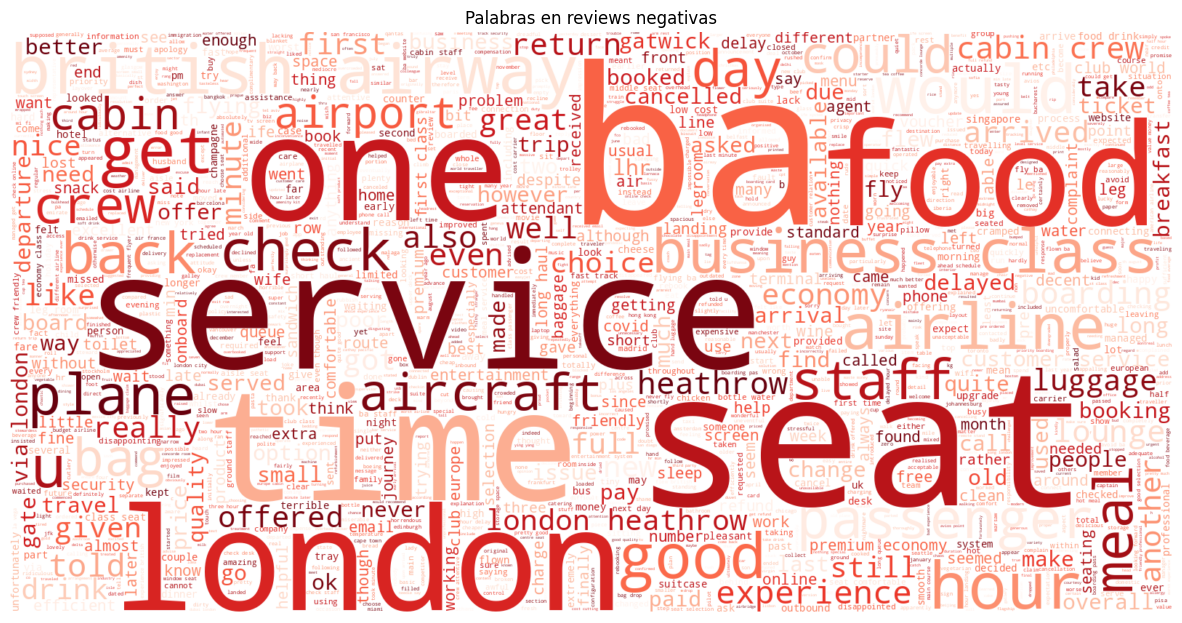

In [158]:
plt.figure(figsize=(15,15))
wordcloud = WordCloud(background_color="white", stopwords = stopwords, max_words=2000, max_font_size= 300,  width=1600, height=800)
wordcloud.generate(words_worst)
plt.imshow(wordcloud.recolor( colormap='Reds' , random_state=17), interpolation="bilinear")
plt.title('Palabras en reviews negativas')
plt.axis('off')

In [159]:
palabras = words_best.split()
top_words_best = pd.Series(palabras).value_counts().to_frame().head(15)
palabras = words_worst.split()
top_words_worst = pd.Series(palabras).value_counts().to_frame().head(15)

Text(0, 0.5, 'Cantidad de apariciones')

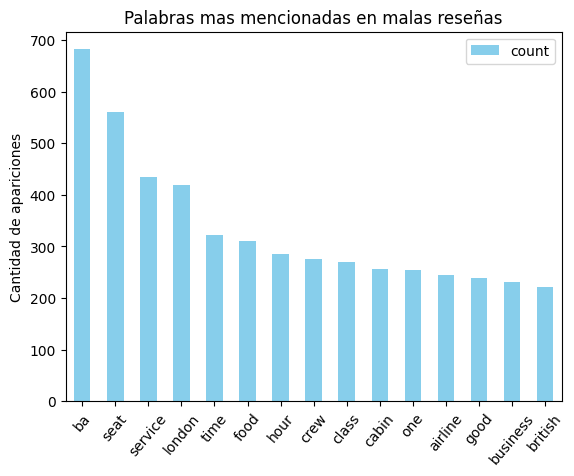

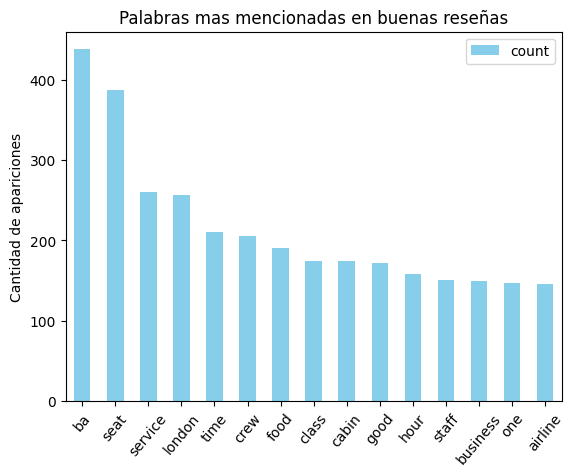

In [160]:
wost_w_plots = top_words_worst.plot(kind='bar', rot=50, color='skyblue')
plt.ylabel("Cantidad de apariciones")
wost_w_plots.set_title('Palabras mas mencionadas en malas reseñas')

best_w_plots =top_words_best.plot(kind='bar', rot=50, color='skyblue')
best_w_plots.set_title('Palabras mas mencionadas en buenas reseñas')
plt.ylabel("Cantidad de apariciones")

--------------------------------------------------------------------------------

Se realiza un análisis de la frecuencia de ciertas palabras, ya sea en los comentarios positivos como negativos

In [161]:
from textblob import TextBlob

def es_positivo(text):
    return TextBlob(text).sentiment.polarity > 0

comments_reviews['is_positive'] = comments_reviews['comments'].transform(es_positivo)

positive_comments = comments_reviews[comments_reviews['is_positive']]
negative_comments = comments_reviews[~comments_reviews['is_positive']]

positive_comments

,reviews,rates,comments,is_positive
0,â Trip Verified | Excellent service both on ...,5,excellent service ground board first class pro...,True
1,â Trip Verified | Good lounge at Cape Town....,9,good lounge cape town time departure drink hig...,True
2,â Trip Verified | A really excellent journe...,9,really excellent journey lounge overcrowded la...,True
5,â Trip Verified | A rather empty and quiet ...,2,rather empty quiet flight tel aviv friendly ca...,True
6,â Trip Verified | Easy check in and staff m...,9,easy check staff member polite helpful made sp...,True
...,...,...,...,...
3335,â Trip Verified | Doha to Paris via London....,10,doha paris via london first time using ba sinc...,True
3344,â Trip Verified | British Airways is my fav...,9,british airway favorite airline boeing year ol...,True
3365,â Trip Verified | London to Belfast. Another...,3,london belfast another regular flight british ...,True
3366,â Trip Verified | Flew British Airways from ...,1,flew british airway lisbon london heathrow une...,True


In [162]:
negative_comments

,reviews,rates,comments,is_positive
3,â Trip Verified | This flight was one of th...,9,flight one worst ever life wanted pamper bough...,False
9,â Trip Verified | Flew ATL to LHR 8th Jan 2...,3,flew atl lhr th jan unlucky enough board year ...,False
15,â Trip Verified | BA website did not work (...,4,ba website work weirdly deleted flight upcomin...,False
16,â Trip Verified | Absolutely terrible exper...,3,absolutely terrible experience british airway ...,False
20,â Trip Verified | Turned up 3.5 hours in adv...,1,urned hour advance terminal london heathrow al...,False
...,...,...,...,...
3343,â Trip Verified | Business Class space is r...,2,business class space ridiculously narrow servi...,False
3352,â Trip Verified | New York to Budapest via ...,4,new york budapest via london second flight bit...,False
3353,â Trip Verified | I was on a flight from New...,5,flight new york jfk budapest via london heathr...,False
3354,â Trip Verified | London to Vienna. I was s...,9,london vienna shocked ba provides buy onboard ...,False


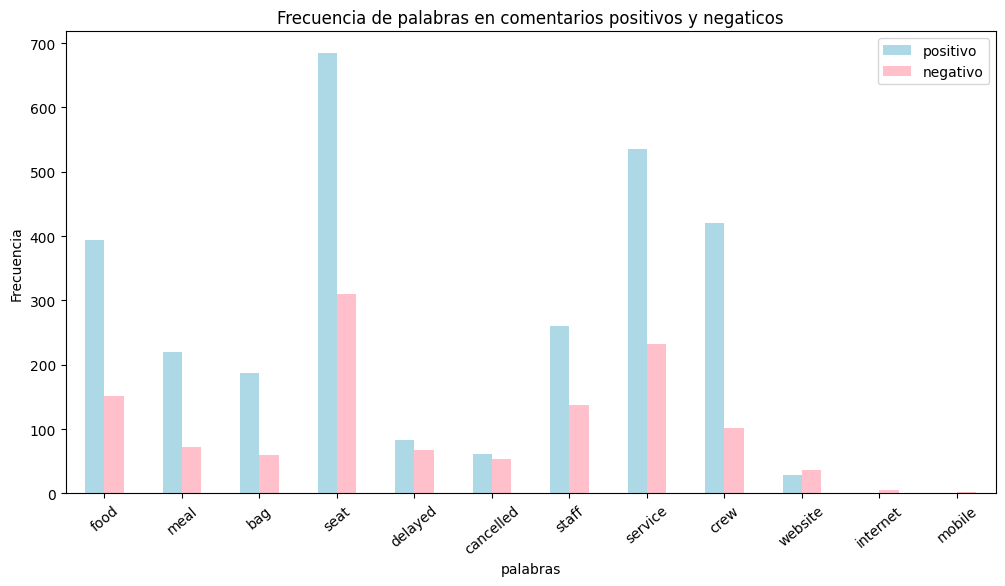

In [163]:
keywords = ["food", "meal", "bag", "seat", "delayed", "cancelled", "staff", "service", "crew", "website", "internet", "mobile"]

countVec = CountVectorizer(lowercase=True, stop_words=stopwords, vocabulary=keywords)

matriz_positivos = countVec.fit_transform(positive_comments['comments'])
matriz_negativos = countVec.fit_transform(negative_comments['comments'])

conteo_positivos = matriz_positivos.toarray().sum(axis=0)
conteo_negativos = matriz_negativos.toarray().sum(axis=0)

resultados_conteo = {
    "positivo": conteo_positivos,
    "negativo": conteo_negativos
}

conteo_keywords = pd.DataFrame(resultados_conteo, index=countVec.get_feature_names_out())

conteo_keywords.plot(kind='bar', color=['lightblue', 'pink'], rot=40, figsize=(12, 6))
plt.title('Frecuencia de palabras en comentarios positivos y negaticos')
plt.xlabel('palabras')
plt.ylabel('Frecuencia')
plt.show()
